In [1]:
using DelimitedFiles
using Plots

In [2]:
base_path = "D:/Uni/3 Mathematics in Data Science/05 Masterarbeit/Experimente/"
directory = "ocean_wind_param_plots_cg/";

In [3]:
resolution = 200
range      = 0.1
days       = 70.0;

In [4]:
filename = "ocean_wind_"*string(resolution)*"_"*string(range)*"_"*string(days)*".csv";

In [5]:
file = readdlm(base_path*directory*filename, ',', Float64, '\n')
ϵ    = file[2,1] - file[1,1]
@assert(round(ϵ,digits=5)*(size(file)[1]-1) / 2 == range)
midpoint = Int((size(file)[1]+1) / 2);

In [6]:
lrs = [10.88278561043947,
       -1.8049894554844133,
      -13.144769917411805,
        4.079752133421953
        ];

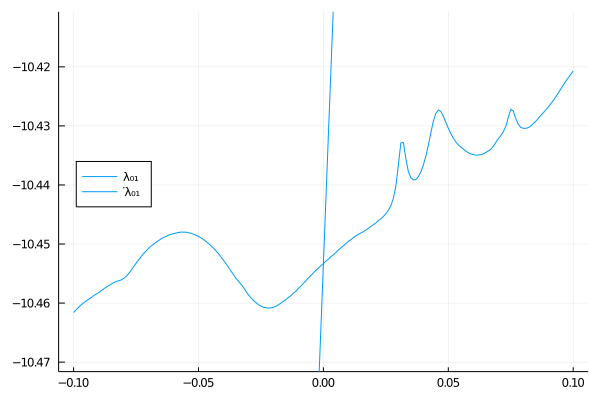

In [7]:
Plots.plot(file[:,1],file[:,2],label="λ₀₁",legend=:left,color=1)
Plots.plot!(file[:,1],file[:,1]*lrs[1] .+ file[midpoint,2],label="̇λ₀₁",color=1)
Plots.plot!(ylims=(minimum(file[:,2])-0.01,maximum(file[:,2])+0.01))

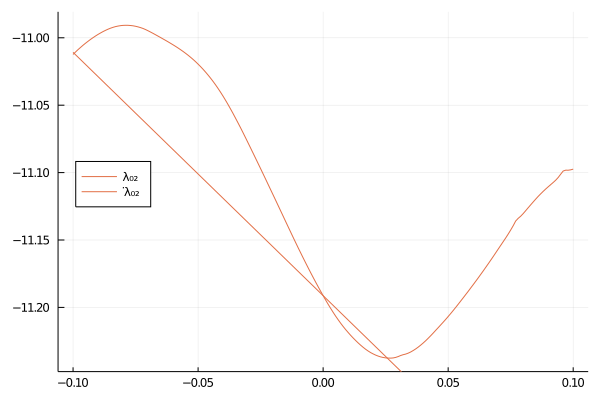

In [8]:
Plots.plot(file[:,1],file[:,3],label="λ₀₂",legend=:left,color=2)
Plots.plot!(file[:,1],file[:,1]*lrs[2] .+ file[midpoint,3],label="̇λ₀₂",color=2)
Plots.plot!(ylims=(minimum(file[:,3])-0.01,maximum(file[:,3])+0.01))

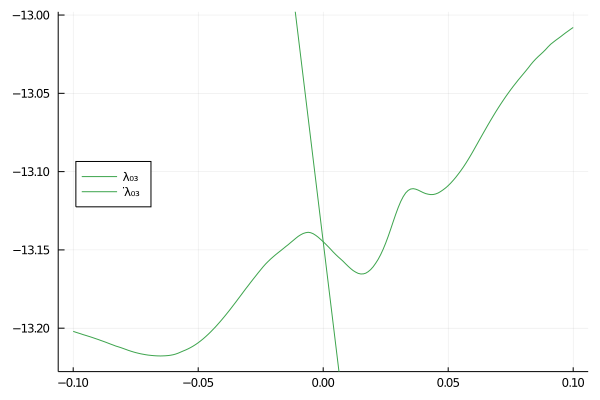

In [9]:
Plots.plot(file[:,1],file[:,4],label="λ₀₃",legend=:left,color=3)
Plots.plot!(file[:,1],file[:,1]*lrs[3] .+ file[midpoint,4],label="̇λ₀₃",color=3)
Plots.plot!(ylims=(minimum(file[:,4])-0.01,maximum(file[:,4])+0.01))

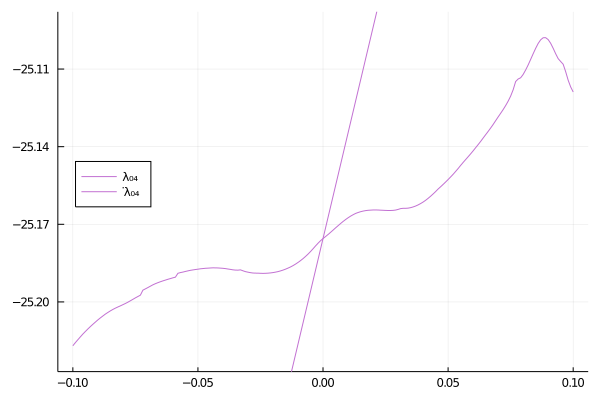

In [10]:
Plots.plot(file[:,1],file[:,5],label="λ₀₄",legend=:left,color=4)
Plots.plot!(file[:,1],file[:,1]*lrs[4] .+ file[midpoint,5],label="̇λ₀₄",color=4)
Plots.plot!(ylims=(minimum(file[:,5])-0.01,maximum(file[:,5])+0.01))

In [11]:
function smoothing(xs,kernel,windowsize)
    xs_smooth = zero(xs)
    for i in 1:length(xs)
        if i < windowsize+1
            window = vcat(repeat([xs[1]],inner=windowsize+1-i,outer=1), xs[1:i+windowsize]) 
        elseif i > length(xs) - windowsize
            window = vcat(xs[i-windowsize:end], repeat([xs[end]],inner=windowsize+i-length(xs),outer=1)) 
        else
           window = xs[i-windowsize:i+windowsize] 
        end
        xs_smooth[i] = kernel(window)
    end
    return xs_smooth
end

smoothing (generic function with 1 method)

In [12]:
function average(xs)
   return sum(xs) / length(xs) 
end

average (generic function with 1 method)

In [13]:
function average3(xs)
    midpoint = Int((length(xs)+1) / 2)    
    return sum(xs[1] + xs[midpoint] + xs[end]) / 3
end

average3 (generic function with 1 method)

In [14]:
function average5(xs)
    midpoint = Int((length(xs)+1) / 2)
    quarter = Int(midpoint / 2) 
    return sum(xs[1] + xs[quarter] + xs[midpoint] + xs[midpoint+quarter] + xs[end]) / 5
end

average5 (generic function with 1 method)

In [15]:
function average7(xs)
    midpoint = Int((length(xs)+1) / 2)
    sixth = Int((length(xs)+1) / 6)
    return sum(xs[1] + xs[sixth] + xs[2*sixth] + xs[midpoint] + xs[4*sixth] + xs[5*sixth] + xs[6]) / 7
end

average7 (generic function with 1 method)

In [16]:
function weighted3(xs)
    midpoint = Int((length(xs)+1) / 2)
    return 0.25xs[1] + 0.5xs[midpoint] + 0.25xs[end]
end

weighted3 (generic function with 1 method)

In [17]:
function weighted5(xs)
    midpoint = Int((length(xs)+1) / 2)
    return 0.05xs[1] + 0.20xs[Int(midpoint/2)] + 0.5xs[midpoint] + 0.20xs[midpoint+Int(midpoint/2)] + 0.05xs[end]
end

weighted5 (generic function with 1 method)

In [18]:
function weighted7(xs)
    midpoint = Int((length(xs)+1) / 2)
    sixth = Int((length(xs)+1) / 6)
    return 0.01xs[1] + 0.04xs[sixth]  + 0.2xs[2*sixth] + 0.5xs[midpoint] + 
            0.2xs[4*sixth] + 0.04xs[5*sixth]  + 0.01xs[end]
end

weighted7 (generic function with 1 method)

In [34]:
ev = 6

6

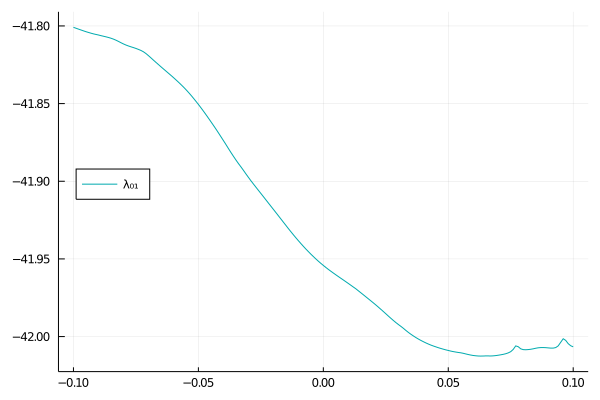

In [35]:
Plots.plot(file[:,1],file[:,ev+1],label="λ₀₁",legend=:left,color=ev)
#Plots.plot!(file[:,1],file[:,1]*lrs[ev] .+ file[midpoint,ev+1],label="̇λ₀₁",color=ev)
Plots.plot!(ylims=(minimum(file[:,ev+1])-0.01,maximum(file[:,ev+1])+0.01),fmt=:png)

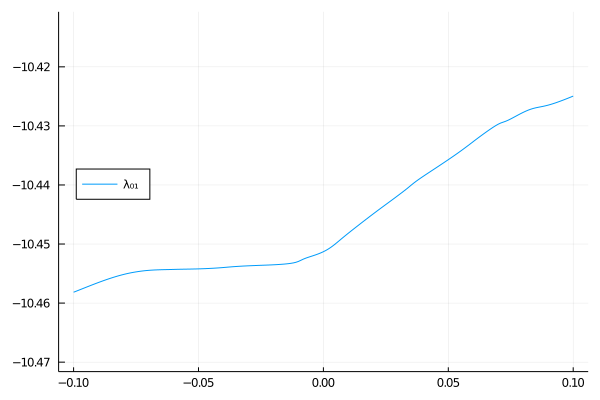

In [21]:
Plots.plot(file[:,1],smoothing(file[:,ev+1],average,40),label="λ₀₁",legend=:left,color=ev)
Plots.plot!(ylims=(minimum(file[:,ev+1])-0.01,maximum(file[:,ev+1])+0.01),fmt=:png)